In [1]:
# Загружаем бибилотеки:
# для работы с математикой
import numpy as np  
# для работы с массивами данных
import pandas as pd
# для работы со статистикой
from scipy import stats
# для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns
# тест Вилкоксона
from scipy.stats import wilcoxon
# тест Манна-Уитни
from scipy.stats import mannwhitneyu
# дисерсионный анализ
from scipy.stats import f_oneway

### Задания 1 и 2

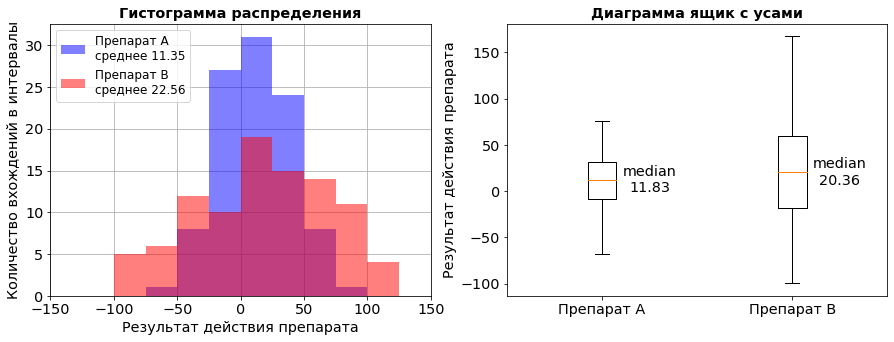

По графикам видно следующее:
- средние значения и медианы расределений А и В различаются примерно в 2 раза
- дисперсии распределений А и В значительно различаются
Это позволяет сделать вывод о наличии разницы в действии препаратов А и В

Для выполнения статистических тестов выдвигаем гипотезы:
- нулевая гипотеза (H0): результаты действия препаратов А и В не отличаются
- альтернативная гипотеза (H1): результаты действия препаратов А и В различаются
Уровень значимости примем 0,05

Расчётное р-значение теста Вилкоксона составляет 0.041, что "превосходит" требуемый уровень значимости 0,05, это позволяет отклонить нулевую гипотезу и сделать вывод о наличии статистически значимой разницы в действии препаратов А и В.

Расчётное р-значение t-теста Стьюдента составляет 0.085, что не позволяет отклонить нулевую гипотезу


In [2]:
# Исходные данные:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100) # Результаты для группы людей получающих препарат А
B = A + stats.norm.rvs(scale=54, loc=11, size=100) # Результаты для группы людей получающих препарат B

# Покажем визуально расределения выборок А и В

# Разбиваем поле графика на две части
fig = plt.figure(figsize=(15, 5)) # Размер поля графиков
axes0 = fig.add_subplot(1, 2, 1) # Ячейка для графика 1
axes1 = fig.add_subplot(1, 2, 2) # Ячейка для графика 2
                
# Гистограмма
axes0.hist(x = A, # Гистограмма для препарата А
             bins = range(-150, 150, 25), # Интервалы гистораммы
             color = 'blue', # Цвет столбцов
             alpha = 0.5, # Прозрачность столбцов
             zorder = 2,
             label = f'Препарат А\nсреднее {round(np.mean(A), 2)}'
             )
axes0.hist(x = B, # Гистограмма для препарата B
             bins = range(-150, 150, 25), 
             color = 'red',
             alpha = 0.5,
             zorder = 2,
             label = f'Препарат B\nсреднее {round(np.mean(B), 2)}'
             )

axes0.set_xlim(-150, 150)
axes0.tick_params(labelsize = 'x-large')
axes0.grid()
axes0.set_xlabel('Результат действия препарата', fontsize = 'x-large')
axes0.set_ylabel('Количество вхождений в интервалы', fontsize = 'x-large')
axes0.set_title('Гистограмма распределения', fontsize = 'x-large', fontweight = 'bold')
axes0.legend(fontsize = 'large')

# Ящик с усами  
axes1.boxplot([A, B])
axes1.tick_params(labelsize = 'x-large')
axes1.set_xticklabels(['Препарат A', 'Препарат B'], fontsize = 'x-large')
axes1.set_ylabel('Результат действия препарата', fontsize = 'x-large')
axes1.set_title('Диаграмма ящик с усами', fontsize = 'x-large', fontweight = 'bold')
# Значения среднего и медианы
axes1.text(x = 1.25, y = np.median(A),
             s = f'median\n{round(np.median(A), 2)}', 
             fontsize = 'x-large', 
             verticalalignment = 'center',
             horizontalalignment = 'center'
            )
axes1.text(x = 2.25, y = np.median(B),
             s = f'median\n{round(np.median(B), 2)}', 
             fontsize = 'x-large', 
             verticalalignment = 'center',
             horizontalalignment = 'center'
            )
plt.show()
print('По графикам видно следующее:')
print('- средние значения и медианы расределений А и В различаются примерно в 2 раза')
print('- дисперсии распределений А и В значительно различаются')
print('Это позволяет сделать вывод о наличии разницы в действии препаратов А и В')
      
print('\nДля выполнения статистических тестов выдвигаем гипотезы:\n- нулевая гипотеза (H0): результаты действия препаратов А и В не отличаются\n- альтернативная гипотеза (H1): результаты действия препаратов А и В различаются')
print('Уровень значимости примем 0,05')
# Используем критерий Вилкоксона
W_stat, p_value = wilcoxon(A, B)
print(f'\nРасчётное р-значение теста Вилкоксона составляет {round(p_value, 3)}, что "превосходит" требуемый уровень значимости 0,05, это позволяет отклонить нулевую гипотезу и сделать вывод о наличии статистически значимой разницы в действии препаратов А и В.')
# Используем t-тест Стьюдента
t_stat, p_value = stats.ttest_ind(A, B)
print(f'\nРасчётное р-значение t-теста Стьюдента составляет {round(p_value, 3)}, что не позволяет отклонить нулевую гипотезу')

### Задание 3

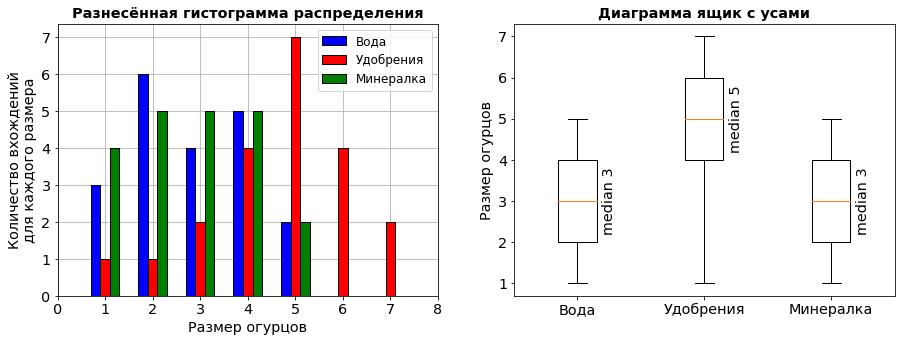

По графикам видно следующее:
- медианы расределений для воды и минералки равны, величины разброса так же равны
- медиана распределения и величина разброса значений для удобрений значительно больше, чем для воды и минералки
Это позволяет сделать вывод об отсутствии влияния минералки на размер огурцов по сравнению с водой и наличие влияния удобрений по сравнению с водой и минералкой

Для выполнения статистических тестов выдвигаем гипотезы:
- нулевая гипотеза (H0): средство не оказывает влияния на размер огурцов
- альтернативная гипотеза (H1): средство влияет на размер огурцов
Уровень значимости примем 0,05

Дисперсионный анализ показал следующее:
- для удобрений по сравнению с водой расчётное р-значение составляет 0.0002, что позволяет отвегнуть нулевую гипотезу и сделать вывод о статистически значимом влиянии удобрений на размер огурцов
- для минералки по сравнению с водой расчётное р-значение составляет 0.92, что не позволяет отвергнуть нулевую гипотезу.


In [3]:
# Исходные данные:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1] # Огурцы с водой
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5] # Огурцы с удобрениями
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4] # Огурцы с минералкой

# Разбиваем поле графика на две части
fig = plt.figure(figsize=(15, 5)) # Размер поля графиков
axes0 = fig.add_subplot(1, 2, 1) # Ячейка для графика 1
axes1 = fig.add_subplot(1, 2, 2) # Ячейка для графика 2

# Гистограмма
axes0.bar(x = (np.unique(water, return_counts = True)[0] - 0.2), # Список уникальных значений
            height = np.unique(water, return_counts = True)[1], # Количество вхождений
            color = 'blue',
            edgecolor = 'black',
            zorder = 2,
            width = 0.2,
            label = 'Вода',
            )
axes0.bar(x = (np.unique(nutri, return_counts = True)[0]), # Список уникальных значений
            height = np.unique(nutri, return_counts = True)[1], # Количество вхождений
            color = 'red',
            edgecolor = 'black',
            zorder = 2,
            width = 0.2,
            label = 'Удобрения',
            )
axes0.bar(x = (np.unique(mineral, return_counts = True)[0] + 0.2), # Список уникальных значений
            height = np.unique(mineral, return_counts = True)[1], # Количество вхождений
            color = 'green',
            edgecolor = 'black',
            zorder = 2,
            width = 0.2,
            label = 'Минералка',
            )
axes0.set_xlim(0, 8)
axes0.tick_params(labelsize = 'x-large')
axes0.grid()
axes0.set_xlabel('Размер огурцов', fontsize = 'x-large')
axes0.set_ylabel('Количество вхождений\nдля каждого размера', fontsize = 'x-large')
axes0.set_title('Разнесённая гистограмма распределения', fontsize = 'x-large', fontweight = 'bold')
axes0.legend(fontsize = 'large')

# Ящик с усами  
axes1.boxplot([water, nutri, mineral])
axes1.tick_params(labelsize = 'x-large')
axes1.set_xticklabels(['Вода', 'Удобрения', 'Минералка'], fontsize = 'x-large')
axes1.set_ylabel('Размер огурцов', fontsize = 'x-large')
axes1.set_title('Диаграмма ящик с усами', fontsize = 'x-large', fontweight = 'bold')
# Значения медианы
axes1.text(x = 1.25, y = np.median(water),
             s = f'median {int(np.median(water))}', 
             fontsize = 'x-large', 
             verticalalignment = 'center',
             horizontalalignment = 'center',
             rotation = 'vertical'
            )
axes1.text(x = 2.25, y = np.median(nutri),
             s = f'median {int(np.median(nutri))}', 
             fontsize = 'x-large', 
             verticalalignment = 'center',
             horizontalalignment = 'center',
             rotation = 'vertical'             
            )
axes1.text(x = 3.25, y = np.median(mineral),
             s = f'median {int(np.median(mineral))}', 
             fontsize = 'x-large', 
             verticalalignment = 'center',
             horizontalalignment = 'center',
             rotation = 'vertical'
            )
plt.show()

print('По графикам видно следующее:')
print('- медианы расределений для воды и минералки равны, величины разброса так же равны')
print('- медиана распределения и величина разброса значений для удобрений значительно больше, чем для воды и минералки')
print('Это позволяет сделать вывод об отсутствии влияния минералки на размер огурцов по сравнению с водой и наличие влияния удобрений по сравнению с водой и минералкой')

print('\nДля выполнения статистических тестов выдвигаем гипотезы:\n- нулевая гипотеза (H0): средство не оказывает влияния на размер огурцов\n- альтернативная гипотеза (H1): средство влияет на размер огурцов')
print('Уровень значимости примем 0,05')

# Используем дисперсионный анализ
print('\nДисперсионный анализ показал следующее:')
f_stat, p_value = stats.f_oneway(water, nutri)
print(f'- для удобрений по сравнению с водой расчётное р-значение составляет {round(p_value, 4)}, что позволяет отвегнуть нулевую гипотезу и сделать вывод о статистически значимом влиянии удобрений на размер огурцов')
f_stat, p_value = stats.f_oneway(water, mineral)
print(f'- для минералки по сравнению с водой расчётное р-значение составляет {round(p_value, 3)}, что не позволяет отвергнуть нулевую гипотезу.')


### Cookie Cats

In [4]:
# Исходные данные для анализа
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'
data = pd.read_csv(cookie_cats, error_bad_lines = False)

In [5]:
#Сгрупируем результаты теста по версиям игры
gate_30_count, gate_40_count = data.groupby('version').count()['userid']
print('Все пользователи разделены на две примерно равные группы:')
print(f'- контрольная группа gate_30, количество пользователей {gate_30_count}')
print(f'- тестовая группа gate_40, количество пользователей {gate_40_count}')

Все пользователи разделены на две примерно равные группы:
- контрольная группа gate_30, количество пользователей 44700
- тестовая группа gate_40, количество пользователей 45489


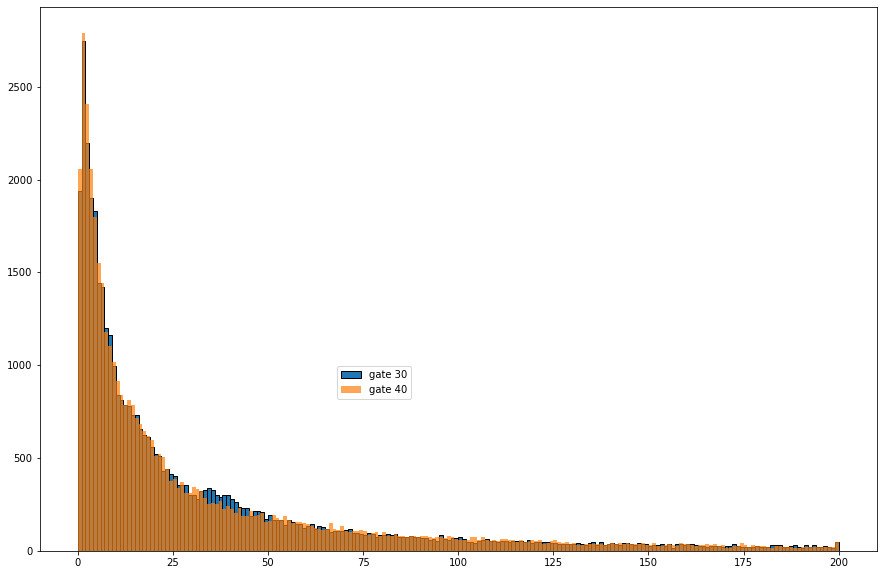

Гистограммы контрольной и тестовой групп близки между собой и показывают, что характер распределения отличается от нормального.


In [6]:
# Выбираем пользователей в контрольную и тестовую группы
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
# Отбрасываем пользователей, сыгравших более 200 раундов на неделю
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)

# Гистограмма
bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

print('Гистограммы контрольной и тестовой групп близки между собой и показывают, что характер распределения отличается от нормального.')

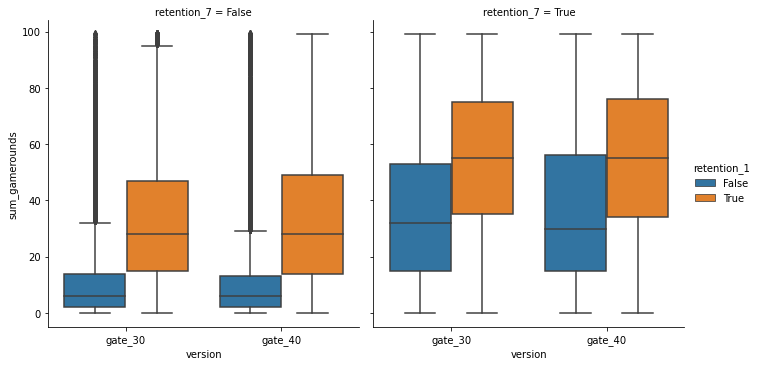

На диаграмме распределения для контрольной и тестовой групп выглядят практически одинаково


In [7]:
# Отбираем пользователей, сыгравших не более 100 раундов
df = data.loc[data['sum_gamerounds'] < 100].copy();

# Диаграмма ящик с усами
sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);
plt.show()
print('На диаграмме распределения для контрольной и тестовой групп выглядят практически одинаково')

In [8]:
# Формируем отдельные датафреймы для контрольной и тестовой групп 
print('По условиям задачи необходимо выявить влияние ворот на удержание игроков. Следовательно, необходимо отбросить игроков, которые играли слишком мало и не сталкивались с воротами.')
print('В обеих группах отбросим тех игроков, кто играл менее 40 раундов и будем работать с остальными. Обратим внимание, что в контрольной групе отбрасываем игроков с количеством раундов менее 40, а не 30, иначе получим смещенную оценку среднего. Таким образом, сравниваем две группы, в каждой из которых игроки почувствовали влияние ворот.')
# Контрольная и тестовая группы
gate_30 = data[(data['version'] == 'gate_30') & (data['sum_gamerounds'] >= 40)]
gate_40 = data[(data['version'] == 'gate_40') & (data['sum_gamerounds'] >= 40)]

print('\nПосле того, как мы избавились от большей части незначащих данных, рассчитаем статистики для интересующих нас данных:')
# Среднее
gate_30_mean = gate_30['sum_gamerounds'].mean()
gate_40_mean = gate_40['sum_gamerounds'].mean()
print(f'- в контрольной группе среднее количество раундов на игрока {round(gate_30_mean, 1)}')
print(f'- в тестовой группе среднее количество раундов на игрока {round(gate_40_mean, 1)}')
print('В контрольной группе среднее немного выше по сравнению с тестовой группой')

print('\nДля выполнения статистических тестов выдвигаем гипотезы:\n- нулевая гипотеза (H0): ворота не оказывают влияния на среднее количество раундов на одного игрока\n- альтернативная гипотеза (H1): ворота влияют на среднее количество раундов на одного игрока')
print('Уровень значимости примем 0,05')

print('\nТак как распределение не нормальное и выборки независимы, используем U-критерий Манна-Уитни')
u_stat, p_value = mannwhitneyu(gate_30['sum_gamerounds'], gate_40['sum_gamerounds'])
print(f'Для теста Манна-Уитни расчётное р-значение составляет {round(p_value, 3)}, что "превосходит" требуемый уровень значимости 0,05, позволяет отвегнуть нулевую гипотезу и сделать вывод о статистически значимом влиянии ворот на среднее количество раундов на игрока')
print('\nВывод: версия gate_30 даёт лучшее удержание игроков по сравнению с gate_40!')



По условиям задачи необходимо выявить влияние ворот на удержание игроков. Следовательно, необходимо отбросить игроков, которые играли слишком мало и не сталкивались с воротами.
В обеих группах отбросим тех игроков, кто играл менее 40 раундов и будем работать с остальными. Обратим внимание, что в контрольной групе отбрасываем игроков с количеством раундов менее 40, а не 30, иначе получим смещенную оценку среднего. Таким образом, сравниваем две группы, в каждой из которых игроки почувствовали влияние ворот.

После того, как мы избавились от большей части незначащих данных, рассчитаем статистики для интересующих нас данных:
- в контрольной группе среднее количество раундов на игрока 145.7
- в тестовой группе среднее количество раундов на игрока 142.7
В контрольной группе среднее немного выше по сравнению с тестовой группой

Для выполнения статистических тестов выдвигаем гипотезы:
- нулевая гипотеза (H0): ворота не оказывают влияния на среднее количество раундов на одного игрока
- альтерна

In [9]:
print('Дополнительно сравним контрольную и тестовую группы с пользователями, игравшими от 30 до 40 раундов. То есть, в контрольной группе пользователи уже столкнулись с действием ворот, а в контрольной ещё нет.')
# Контрольная и тестовая группы
gate_30_2030 = data[(data['version'] == 'gate_30') & (data['sum_gamerounds'] < 40) & (data['sum_gamerounds'] >= 30)]
gate_40_2030 = data[(data['version'] == 'gate_40') & (data['sum_gamerounds'] < 40) & (data['sum_gamerounds'] >= 30)]
# Среднее
gate_30_2030_mean = gate_30_2030['sum_gamerounds'].mean()
gate_40_2030_mean = gate_40_2030['sum_gamerounds'].mean()
print(f'\nВ контрольной группе среднее количество раундов на игрока {round(gate_30_2030_mean, 1)}')
print(f'В тестовой группе среднее количество раундов на игрока {round(gate_40_2030_mean, 1)}')
print('В контрольной группе среднее немного выше по сравнению с тестовой группой')

u_stat, p_value = mannwhitneyu(gate_30_2030['sum_gamerounds'], gate_40_2030['sum_gamerounds'])
print(f'\nДля теста Манна-Уитни расчётное р-значение составляет {round(p_value, 6)}, что "превосходит" требуемый уровень значимости 0,05, позволяет отвегнуть нулевую гипотезу и сделать вывод о статистически значимом влиянии ворот на среднее количество раундов на игрока')
print('\nВывод: версия gate_30 даёт лучшее удержание игроков по сравнению с gate_40!')


Дополнительно сравним контрольную и тестовую группы с пользователями, игравшими от 30 до 40 раундов. То есть, в контрольной группе пользователи уже столкнулись с действием ворот, а в контрольной ещё нет.

В контрольной группе среднее количество раундов на игрока 34.5
В тестовой группе среднее количество раундов на игрока 34.1
В контрольной группе среднее немного выше по сравнению с тестовой группой

Для теста Манна-Уитни расчётное р-значение составляет 1e-06, что "превосходит" требуемый уровень значимости 0,05, позволяет отвегнуть нулевую гипотезу и сделать вывод о статистически значимом влиянии ворот на среднее количество раундов на игрока

Вывод: версия gate_30 даёт лучшее удержание игроков по сравнению с gate_40!


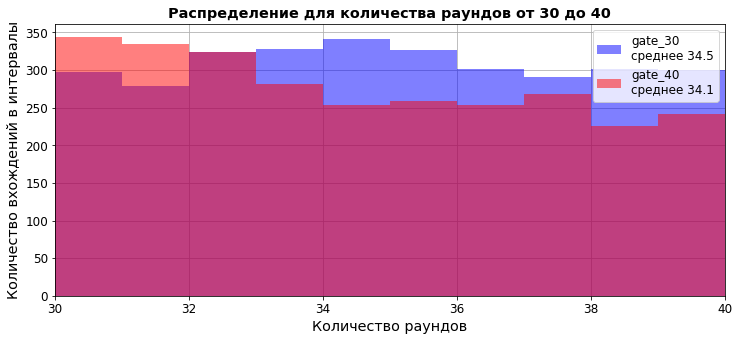

По гистограмме видно, что распределение gate_30 смещено в область больших значений по сравнению с gate_40


In [10]:
# Визуализации

# Гистограмма от 30 до 40 раундов
plt.figure(figsize=(12, 5)) # Размер поля графиков
plt.hist(x = gate_30_2030['sum_gamerounds'],
         bins = range(30, 41), # Интервалы гистораммы
         color = 'blue', # Цвет столбцов
         alpha = 0.5, # Прозрачность столбцов
         zorder = 2,
         label = f'gate_30\nсреднее {round(gate_30_2030_mean, 1)}'
         )
plt.hist(x = gate_40_2030['sum_gamerounds'],
         bins = range(30, 41), 
         color = 'red',
         alpha = 0.5,     
         zorder = 2,
         label = f'gate_40\nсреднее {round(gate_40_2030_mean, 1)}'
         )
# Основная сетка
plt.grid()
# Пределы по осям и надписи
plt.xlim(30, 40)
plt.tick_params(labelsize = 'large')
plt.title('Распределение для количества раундов от 30 до 40', fontsize = 'x-large', fontweight = 'bold')
plt.xlabel('Количество раундов', fontsize = 'x-large')
plt.ylabel('Количество вхождений в интервалы', fontsize = 'x-large')
plt.legend(fontsize = 'large')
plt.show()

print('По гистограмме видно, что распределение gate_30 смещено в область больших значений по сравнению с gate_40')

## Покемоны и AB-тестирование 

In [11]:
# Исходные данные
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)

### Задание 1

In [12]:
# Отбираем покемонов, у которых в поле Class 1 или Class 2 встречается Grass, но при этом не встречается Rock
grass_pokemon = pokemon[((pokemon['Class 1'] == 'Grass') | (pokemon['Class 2'] == 'Grass')) & (pokemon['Class 1'] != 'Rock') & (pokemon['Class 2'] != 'Rock')]
# Аналогично Class 1 или Class 2 встречается Rock, но при этом не встречается Grass
rock_pokemon = pokemon[((pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')) & (pokemon['Class 1'] != 'Grass') & (pokemon['Class 2'] != 'Grass')]

print(f'Средние значения обычной атаки для покемонов:\n- класса Grass {round(grass_pokemon.Attack.mean(), 2)}\n- класса Rock {round(rock_pokemon.Attack.mean(), 2)}')
print('\nДля выполнения статистических тестов выдвигаем гипотезы:\n- нулевая гипотеза (H0): средние значения атаки покемонов классов Grass и Rock не отличаются\n- альтернативная гипотеза (H1): средние значения атаки покемонов классов Grass и Rock различаются')
print('Уровень значимости примем 0,05')

print('\nДля подтверждения используем дисперсионный анализ. ')
f_stat, p_value = stats.f_oneway(grass_pokemon['Attack'], rock_pokemon['Attack'])
print(f'Расчётное р-значение составляет {round(p_value, 4)}, что "превосходит" требуемый уровень значимости 0,05, позволяет отвегнуть нулевую гипотезу и сделать вывод о статистически значимой разнице в средних значениях обычной атаки покемонов.')
print('\nВывод: обычная атака покемонов класса Grass в среднем слабее по сравнению с покемонами класса Rock')


Средние значения обычной атаки для покемонов:
- класса Grass 73.73
- класса Rock 91.79

Для выполнения статистических тестов выдвигаем гипотезы:
- нулевая гипотеза (H0): средние значения атаки покемонов классов Grass и Rock не отличаются
- альтернативная гипотеза (H1): средние значения атаки покемонов классов Grass и Rock различаются
Уровень значимости примем 0,05

Для подтверждения используем дисперсионный анализ. 
Расчётное р-значение составляет 0.0003, что "превосходит" требуемый уровень значимости 0,05, позволяет отвегнуть нулевую гипотезу и сделать вывод о статистически значимой разнице в средних значениях обычной атаки покемонов.

Вывод: обычная атака покемонов класса Grass в среднем слабее по сравнению с покемонами класса Rock


### Задание 2

In [13]:
# Отбираем покемонов, у которых в поле Class 1 или Class 2 встречается Grass, но при этом не встречается Rock
water_pokemon = pokemon[((pokemon['Class 1'] == 'Water') | (pokemon['Class 2'] == 'Water')) & (pokemon['Class 1'] != 'Normal') & (pokemon['Class 2'] != 'Normal')]
# Аналогично Class 1 или Class 2 встречается Rock, но при этом не встречается Grass
normal_pokemon = pokemon[((pokemon['Class 1'] == 'Normal') | (pokemon['Class 2'] == 'Normal')) & (pokemon['Class 1'] != 'Water') & (pokemon['Class 2'] != 'Water')]

print(f'Средние значения скорости для покемонов:\n- класса Water {round(water_pokemon.Speed.mean(), 2)}\n- класса Normal {round(normal_pokemon.Speed.mean(), 2)}')
print('\nДля выполнения статистических тестов выдвигаем гипотезы:\n- нулевая гипотеза (H0): средние значения скорости покемонов классов Water и Normal не отличаются\n- альтернативная гипотеза (H1): средние значения скорости покемонов классов Water и Normal различаются')
print('Уровень значимости примем 0,05')

print('\nДля подтверждения используем дисперсионный анализ. ')
f_stat, p_value = stats.f_oneway(water_pokemon['Speed'], normal_pokemon['Speed'])
print(f'Расчётное р-значение составляет {round(p_value, 3)}, что "превосходит" требуемый уровень значимости 0,05, позволяет отвегнуть нулевую гипотезу и сделать вывод о статистически значимой разнице в средних значениях скорости покемонов.')
print('\nВывод: скорость покемонов класса Water в среднем меньше по сравнению с покемонами класса Normal')


Средние значения скорости для покемонов:
- класса Water 64.94
- класса Normal 72.26

Для выполнения статистических тестов выдвигаем гипотезы:
- нулевая гипотеза (H0): средние значения скорости покемонов классов Water и Normal не отличаются
- альтернативная гипотеза (H1): средние значения скорости покемонов классов Water и Normal различаются
Уровень значимости примем 0,05

Для подтверждения используем дисперсионный анализ. 
Расчётное р-значение составляет 0.033, что "превосходит" требуемый уровень значимости 0,05, позволяет отвегнуть нулевую гипотезу и сделать вывод о статистически значимой разнице в средних значениях скорости покемонов.

Вывод: скорость покемонов класса Water в среднем меньше по сравнению с покемонами класса Normal


### Задание 3 и 4 

In [14]:
# Ускоренные покемоны
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']
boosted_pokemon = pokemon[pokemon['Name'].isin(treathed_pokemon)]
# Обычные покемоны
normal_pokemon = pokemon[~pokemon['Name'].isin(treathed_pokemon)]

print(f'Средние значения скорости для покемонов:\n- обычных {round(normal_pokemon.Speed.mean(), 2)}\n- ускоренных {round(boosted_pokemon.Speed.mean(), 2)}')
print('\nДля выполнения статистических тестов выдвигаем гипотезы:\n- нулевая гипотеза (H0): сыворотка ускорения не влияет на средние значения скорости покемонов\n- альтернативная гипотеза (H1): сыворотка ускорения увеличивает среднее значение скорости покемонов')
print('Уровень значимости примем 0,05')

print('\nДля подтверждения используем дисперсионный анализ. ')
f_stat, p_value = stats.f_oneway(boosted_pokemon['Speed'], normal_pokemon['Speed'])
print(f'Расчётное р-значение составляет {round(p_value, 7)}, что "превосходит" требуемый уровень значимости 0,05, позволяет отвегнуть нулевую гипотезу и сделать вывод о статистически значимой разнице в средних значениях скорости покемонов.')
print('\nВывод: сыворотка ускоряет покемонов')


Средние значения скорости для покемонов:
- обычных 67.89
- ускоренных 145.0

Для выполнения статистических тестов выдвигаем гипотезы:
- нулевая гипотеза (H0): сыворотка ускорения не влияет на средние значения скорости покемонов
- альтернативная гипотеза (H1): сыворотка ускорения увеличивает среднее значение скорости покемонов
Уровень значимости примем 0,05

Для подтверждения используем дисперсионный анализ. 
Расчётное р-значение составляет 1e-07, что "превосходит" требуемый уровень значимости 0,05, позволяет отвегнуть нулевую гипотезу и сделать вывод о статистически значимой разнице в средних значениях скорости покемонов.

Вывод: сыворотка ускоряет покемонов


### Задание 5

In [73]:
# Легендарные и обычные покемоны
# Сумма и произведение HP, Attack, Defense
common_sum = pokemon[pokemon['Legendary'] == False].loc[:,['HP', 'Attack', 'Defense']].sum(axis = 1)
common_mult = pokemon[pokemon['Legendary'] == False].loc[:,['HP', 'Attack', 'Defense']].product(axis = 1)
legendary_sum = pokemon[pokemon['Legendary'] == True].loc[:,['HP', 'Attack', 'Defense']].sum(axis = 1)
legendary_mult = pokemon[pokemon['Legendary'] == True].loc[:,['HP', 'Attack', 'Defense']].product(axis = 1)

print(f'Средние значения характеристик HP, Attack, Defense для обычных покемонов:\n- сумма {int(common_sum.mean())}\n- произведение {int(common_mult.mean())}')
print(f'\nСредние значения характеристик HP, Attack, Defense для легендарных покемонов:\n- сумма {int(legendary_sum.mean())}\n- произведение {int(legendary_mult.mean())}')

print('\nДля выполнения статистических тестов выдвигаем гипотезы:\n- нулевая гипотеза (H0): средние значения характеристик обычных и легендарных покемонов не отличаются\n- альтернативная гипотеза (H1): средние значения характеристик обычных и легендарных покемонов различаются')
print('Уровень значимости примем 0,05')

print('\nДля подтверждения используем дисперсионный анализ. ')
f_stat_sum, p_value_sum = stats.f_oneway(common_sum, legendary_sum)
f_stat_mult, p_value_mult = stats.f_oneway(common_mult, legendary_mult)
print(f'Расчётные р-значения для суммы и произведения характеристик покемонов составляют {p_value_sum} и {p_value_mult} , что "превосходит" требуемый уровень значимости 0,05, позволяет отвегнуть нулевую гипотезу и сделать вывод о статистически значимой разнице в средних значениях характеристик обычных и легендарных покемонов.')

print('\nВывод: средние значения суммы и произведения характеристик HP, Attack, Defense легендарных покемонов выше, чем у обычных')




Средние значения характеристик HP, Attack, Defense для обычных покемонов:
- сумма 214
- произведение 425041

Средние значения характеристик HP, Attack, Defense для легендарных покемонов:
- сумма 309
- произведение 1085941

Для выполнения статистических тестов выдвигаем гипотезы:
- нулевая гипотеза (H0): средние значения характеристик обычных и легендарных покемонов не отличаются
- альтернативная гипотеза (H1): средние значения характеристик обычных и легендарных покемонов различаются
Уровень значимости примем 0,05

Для подтверждения используем дисперсионный анализ. 
Расчётные р-значения для суммы и произведения характеристик покемонов составляют 7.97094220572035e-29 и 1.9926643088419018e-36 , что "превосходит" требуемый уровень значимости 0,05, позволяет отвегнуть нулевую гипотезу и сделать вывод о статистически значимой разнице в средних значениях характеристик обычных и легендарных покемонов.

Вывод: средние значения суммы и произведения характеристик HP, Attack, Defense легендарных 

### Задание 6

In [87]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
# Обычная защита
rock_defense = pokemon[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')]['Defense']
ground_defense = pokemon[(pokemon['Class 1'] == 'Ground') | (pokemon['Class 2'] == 'Ground')]['Defense']
steel_defense = pokemon[(pokemon['Class 1'] == 'Steel') | (pokemon['Class 2'] == 'Steel')]['Defense']
ice_defense = pokemon[(pokemon['Class 1'] == 'Ice') | (pokemon['Class 2'] == 'Ice')]['Defense']

print(f'Средние значения обычной защиты покемонов:\n- класса Rock {round(rock_defense.mean(), 2)}\n- класса Ground {round(ground_defense.mean(), 2)}\n- класса Steel {round(steel_defense.mean(), 2)}\n- класса Ice {round(ice_defense.mean(), 2)}')

print('\nДля выполнения статистических тестов выдвигаем гипотезы:\n- нулевая гипотеза (H0): средние значения обычной защиты для покемонов указанных классов не отличаются\n- альтернативная гипотеза (H1): средние значения обычной защиты для покемонов указанных классов различаются')
print('Уровень значимости примем 0,05')

print('\nДля подтверждения используем дисперсионный анализ. ')
f_stat, p_value = stats.f_oneway(rock_defense, ground_defense, steel_defense, ice_defense)
print(f'Расчётное р-значение составляют {round(p_value, 6)}, что "превосходит" требуемый уровень значимости 0,05, позволяет отвегнуть нулевую гипотезу и сделать вывод о статистически значимой разнице в средних значениях защиты покемонов.')
print('\nВывод: средние значения обычной защиты покемонов классов Rock, Ground, Steel, Ice различаются')



Средние значения обычной защиты покемонов:
- класса Rock 107.09
- класса Ground 87.7
- класса Steel 116.61
- класса Ice 76.66

Для выполнения статистических тестов выдвигаем гипотезы:
- нулевая гипотеза (H0): средние значения обычной защиты для покемонов указанных классов не отличаются
- альтернативная гипотеза (H1): средние значения обычной защиты для покемонов указанных классов различаются
Уровень значимости примем 0,05

Для подтверждения используем дисперсионный анализ. 
Расчётное р-значение составляют 1e-06, что "превосходит" требуемый уровень значимости 0,05, позволяет отвегнуть нулевую гипотезу и сделать вывод о статистически значимой разнице в средних значениях защиты покемонов.

Вывод: средние значения обычной защиты покемонов классов Rock, Ground, Steel, Ice различаются
